In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 수집 및 로드
gym_df = pd.read_csv('../data/gym_churn.csv')
gym_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# 데이터 구조 및 변수 이해
print(gym_df.shape)
print('-----------------------')
print(gym_df.columns)
print('-----------------------')
print(gym_df.dtypes)

(4000, 14)
-----------------------
Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')
-----------------------
gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dty

In [4]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
print('중복된 행 수: ', gym_df.duplicated().sum()) # 중복값 없음

중복된 행 수:  0


In [10]:
# 결측치 탐지
gym_df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

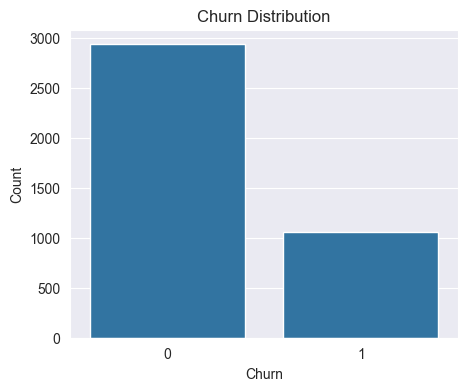

In [24]:

plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=gym_df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

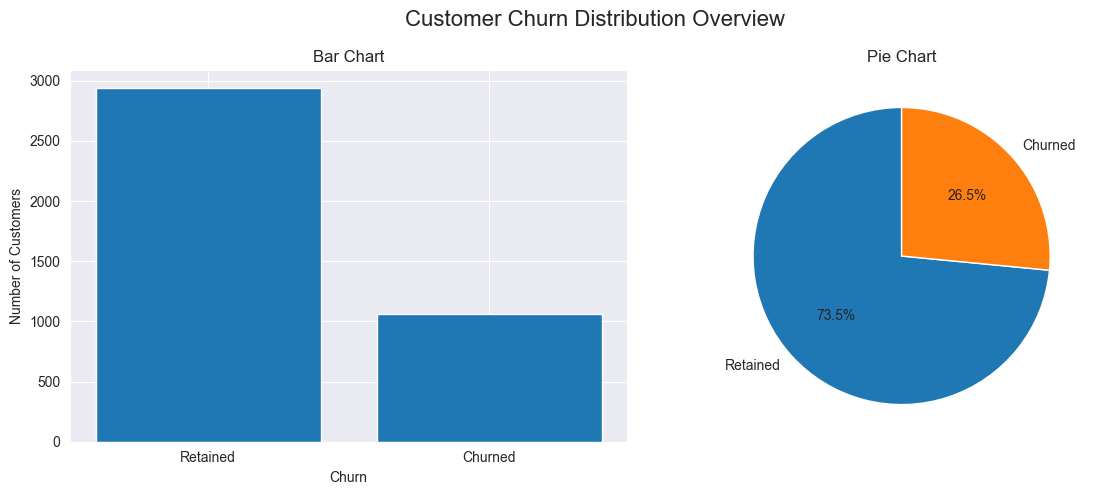

In [20]:
# 타겟 변수 비율 확인

# Calculate churn distribution
churn_counts = gym_df['Churn'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
axes[0].bar(churn_counts.index, churn_counts.values)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Retained', 'Churned'])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Number of Customers')
axes[0].set_title('Bar Chart')

# Pie Chart
axes[1].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart')

# Adjust layout
fig.suptitle('Customer Churn Distribution Overview', fontsize=16)
plt.tight_layout()
plt.show()

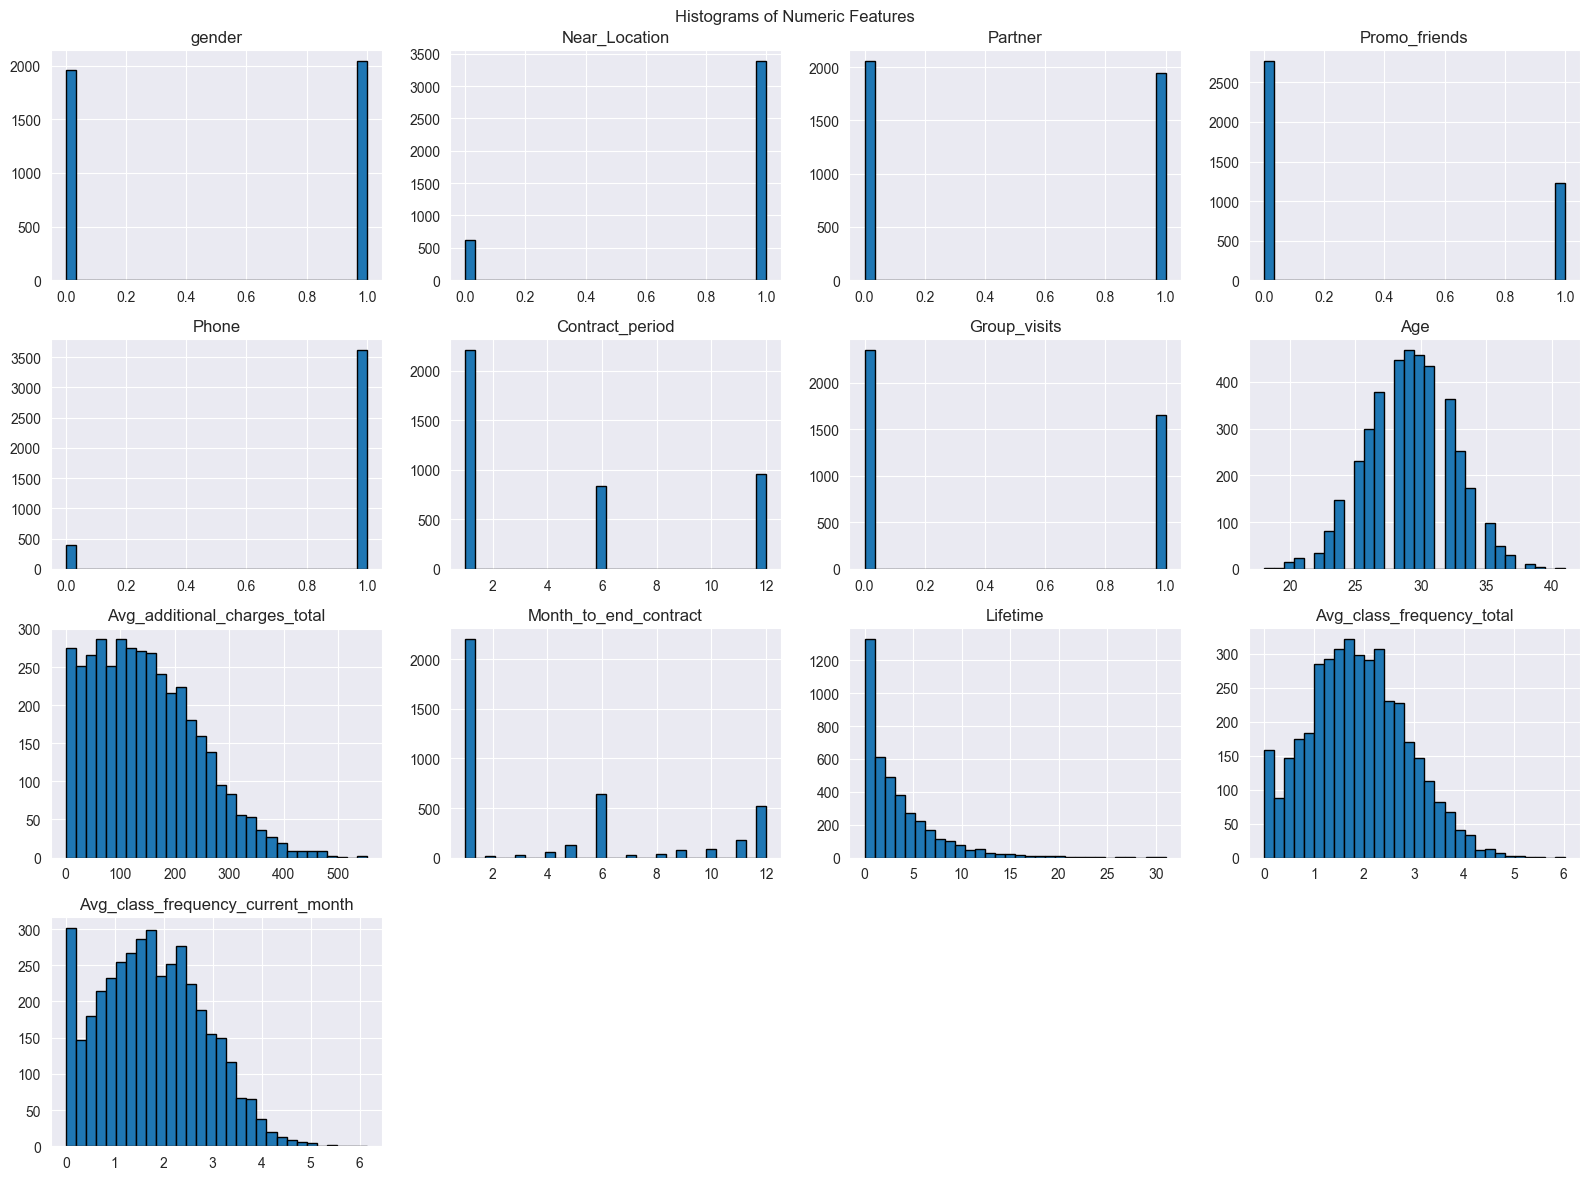

In [25]:
# 변수 분포
num_cols = gym_df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

gym_df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

In [14]:
# IQR 방법으로 이상치 개수 확인
numeric_cols = gym_df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = gym_df[col].quantile(0.25)
    Q3 = gym_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((gym_df[col] < lower) | (gym_df[col] > upper)).sum()
    print(f'{col:<40} 이상치 수: {outlier_count}')

gender                                   이상치 수: 0
Near_Location                            이상치 수: 619
Partner                                  이상치 수: 0
Promo_friends                            이상치 수: 0
Phone                                    이상치 수: 386
Contract_period                          이상치 수: 0
Group_visits                             이상치 수: 0
Age                                      이상치 수: 32
Avg_additional_charges_total             이상치 수: 29
Month_to_end_contract                    이상치 수: 0
Lifetime                                 이상치 수: 192
Avg_class_frequency_total                이상치 수: 16
Avg_class_frequency_current_month        이상치 수: 8
Churn                                    이상치 수: 0


<Figure size 2000x1500 with 0 Axes>

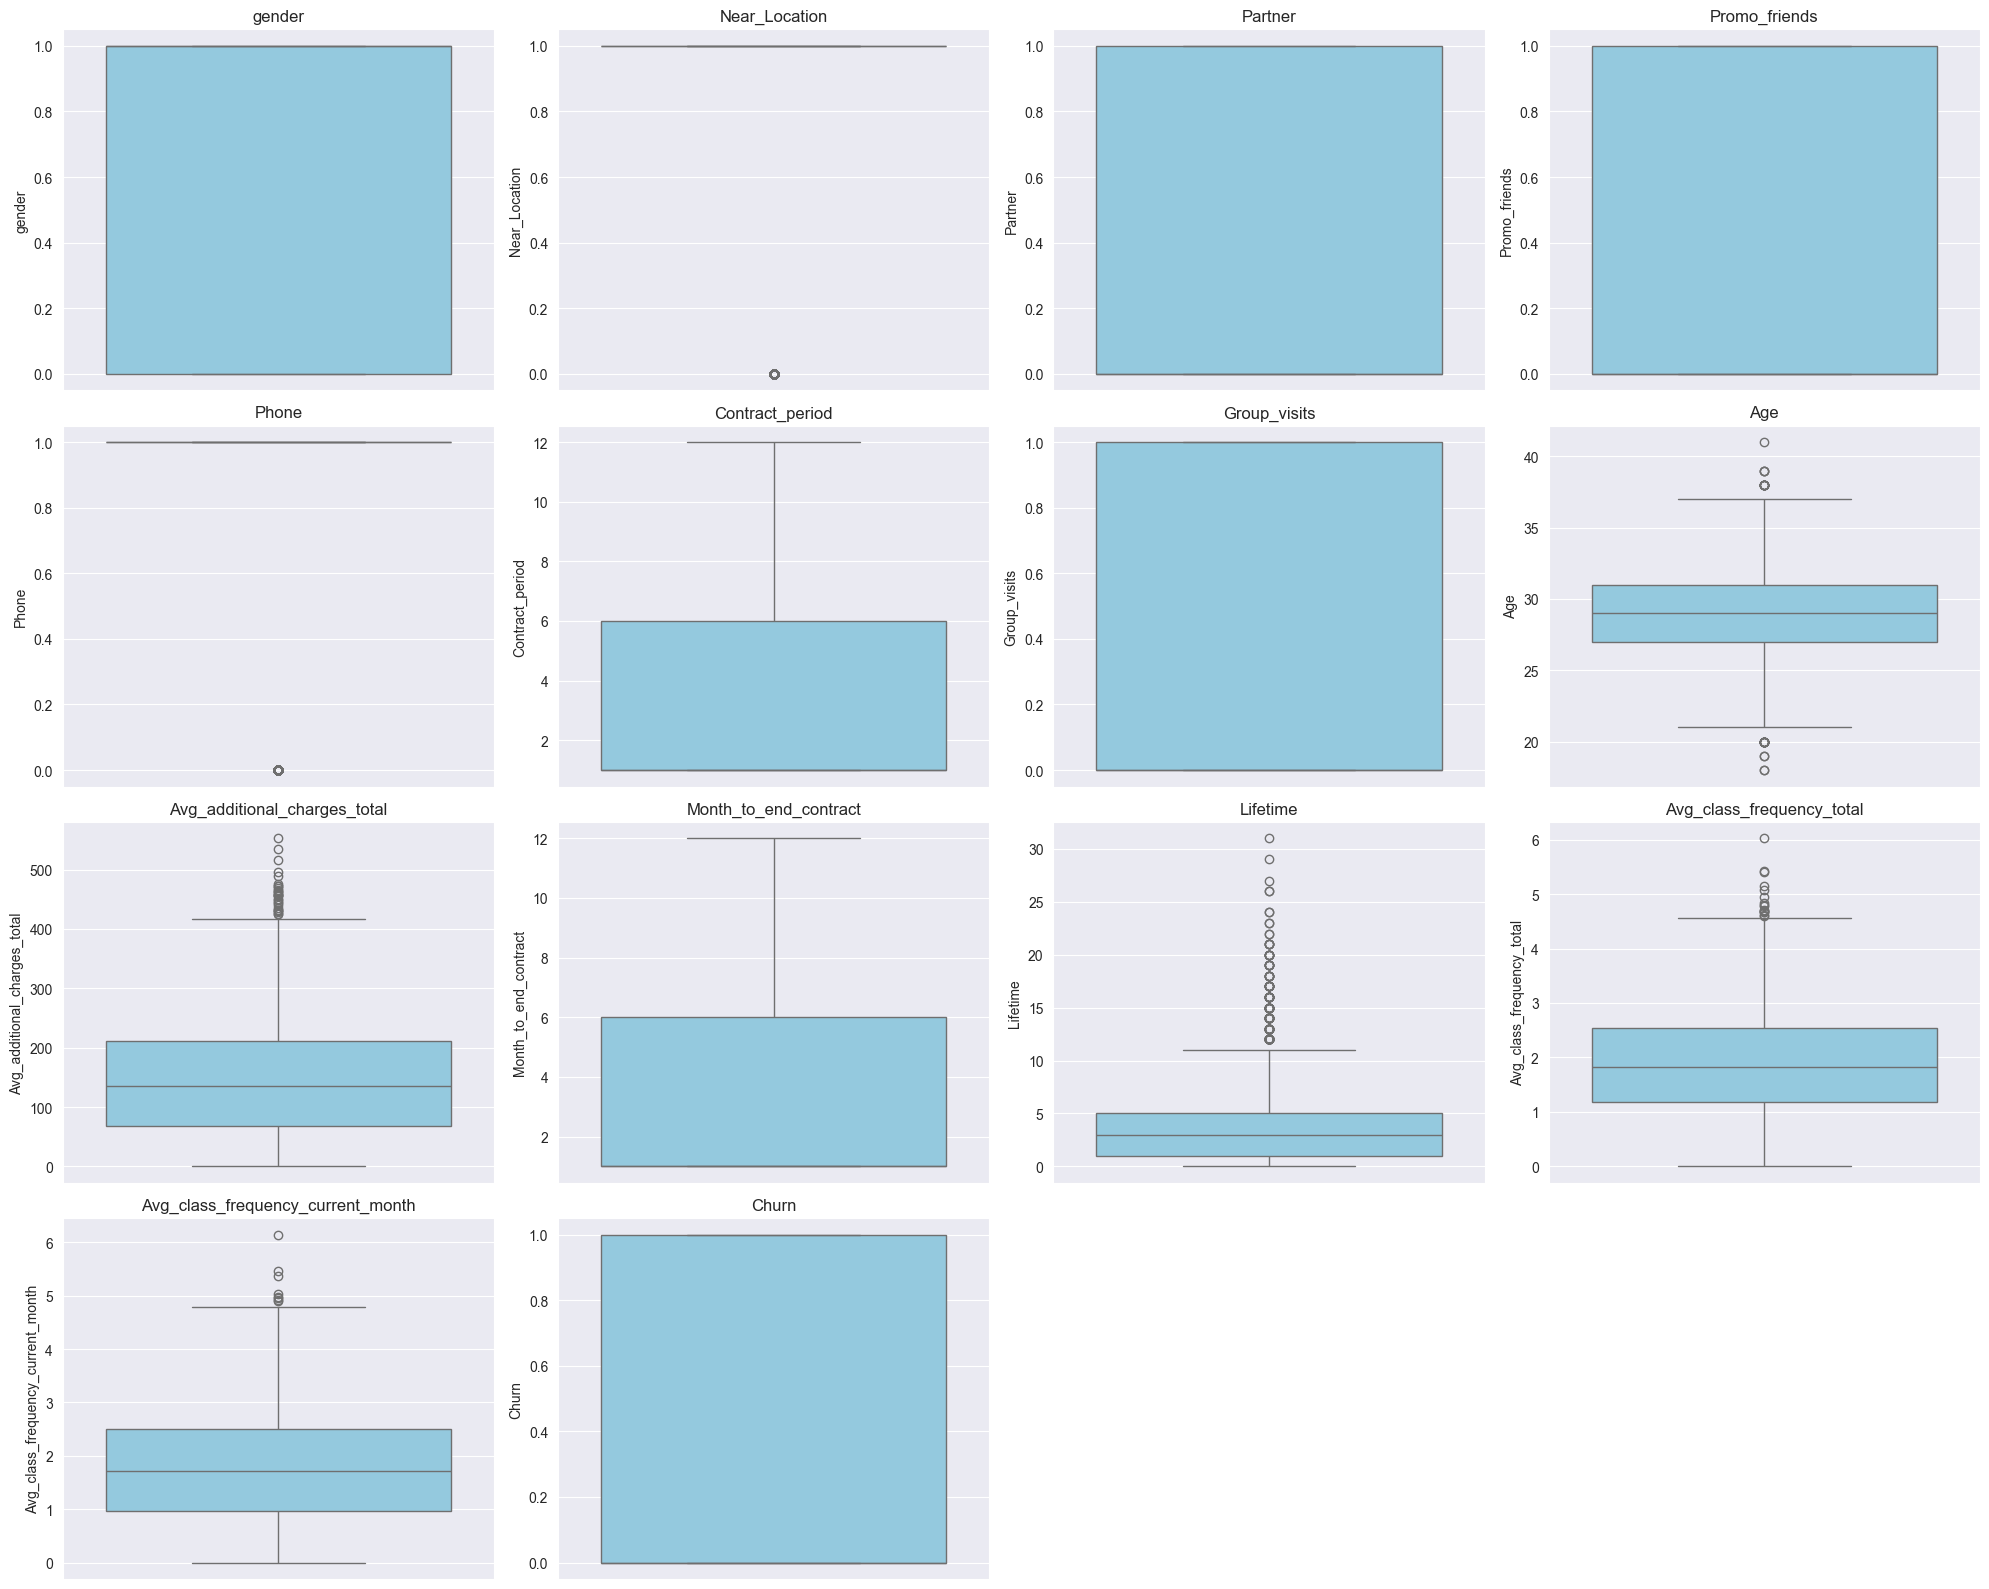

In [12]:
import math

# 박스플롯(Boxplot)으로 시각화
# 수치형 변수만 추출
numeric_cols = gym_df.select_dtypes(include='number').columns

# 박스플롯 그리기 (4x4 격자)
plt.figure(figsize=(20, 15))

n = len(numeric_cols)
rows = math.ceil(n / 4)

plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 4, i + 1)
    sns.boxplot(data=gym_df, y=col, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

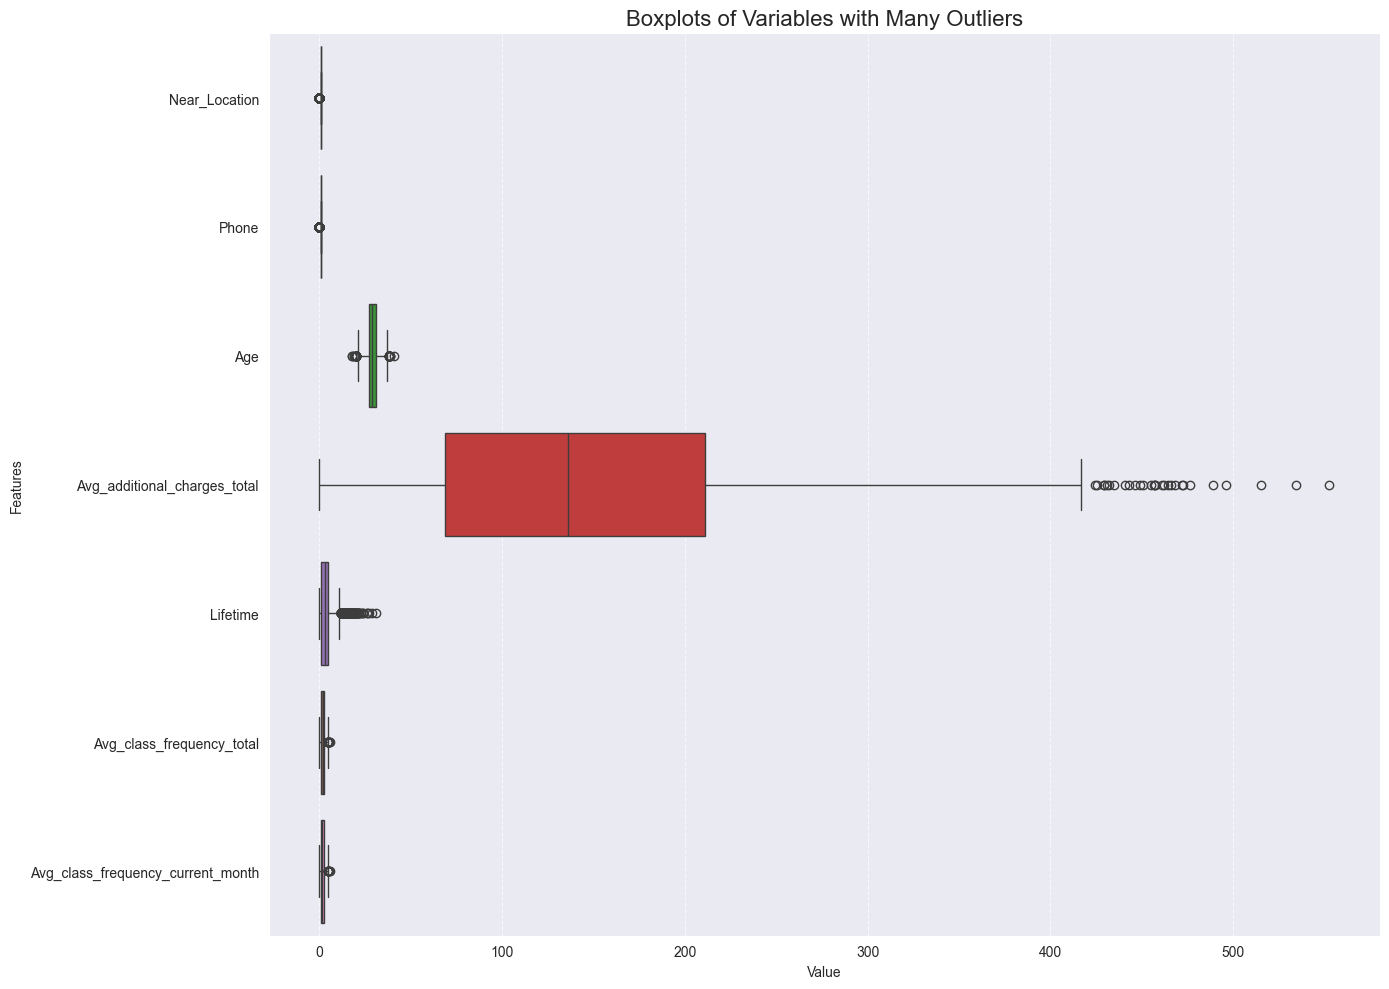

In [15]:
# 이상치가 있는 주요 변수 리스트
outlier_vars = [
    'Near_Location', 'Phone', 'Age', 'Avg_additional_charges_total',
    'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'
]

# 박스플롯 그리기
plt.figure(figsize=(14, 10))
sns.boxplot(data=gym_df[outlier_vars], orient='h')
plt.title('Boxplots of Variables with Many Outliers', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

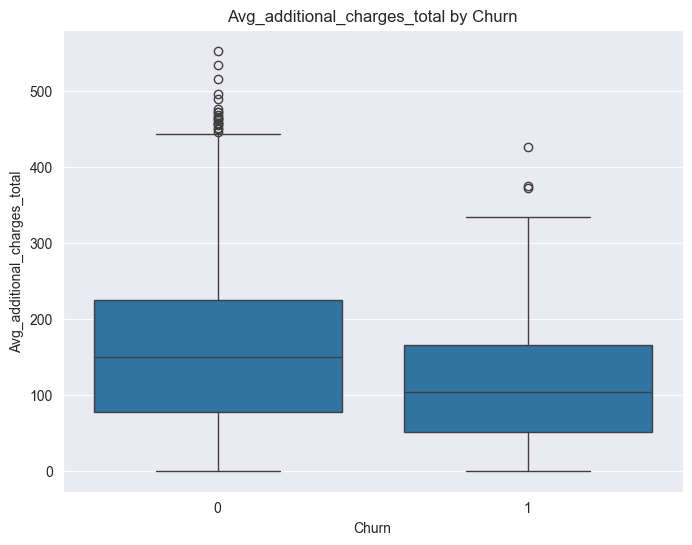

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Avg_additional_charges_total', data=gym_df)
plt.title('Avg_additional_charges_total by Churn')
plt.show()

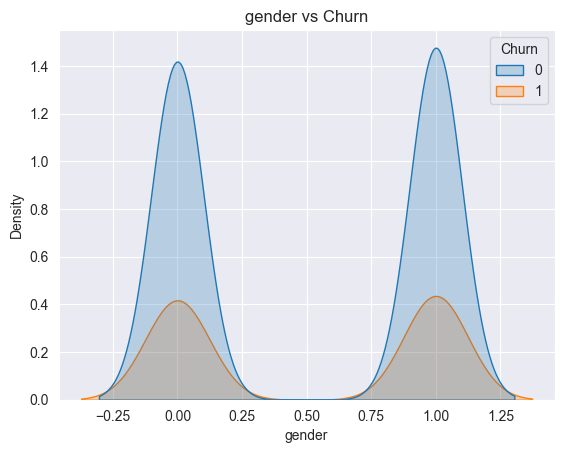

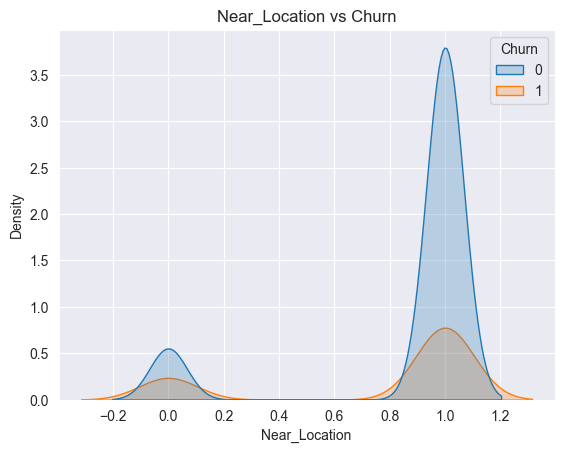

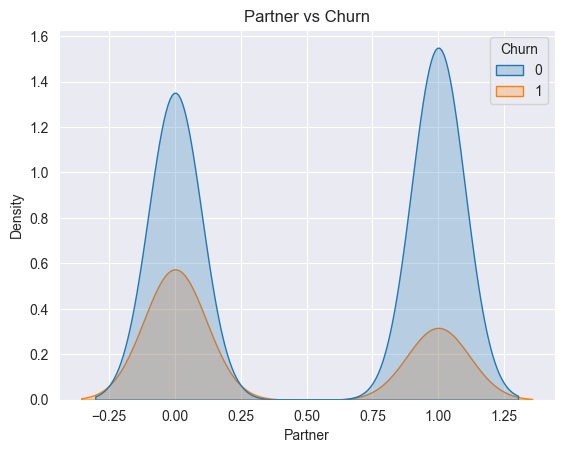

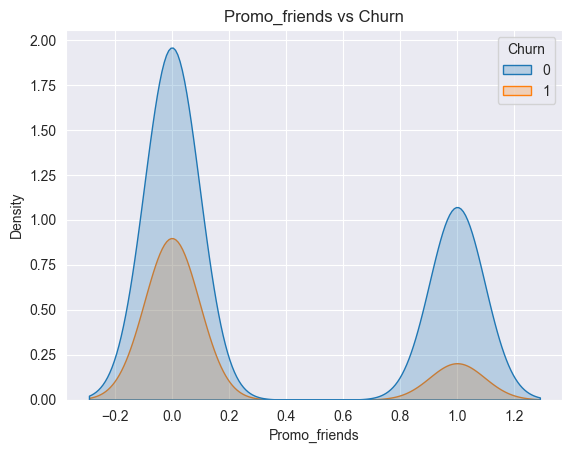

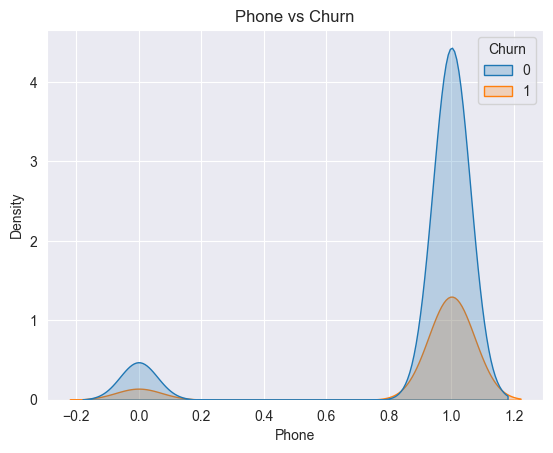

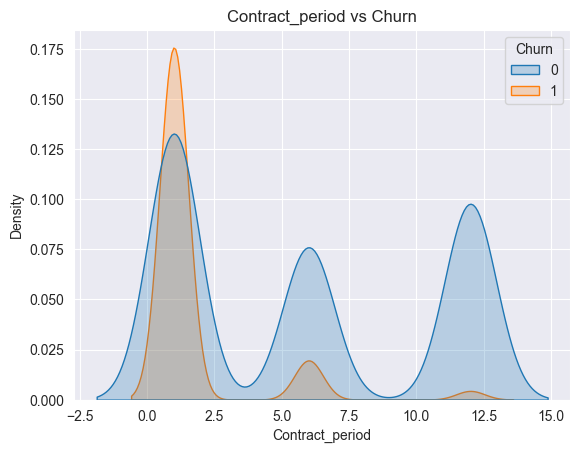

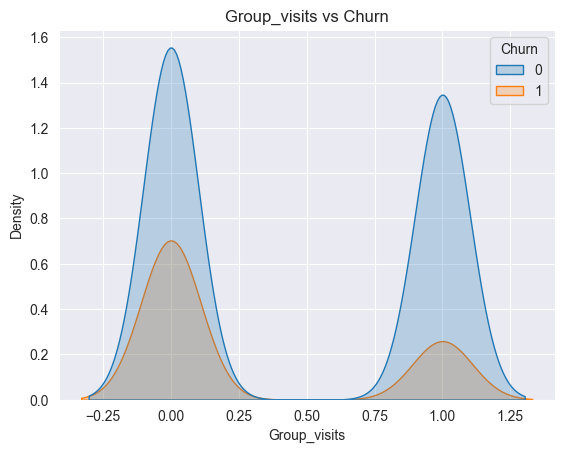

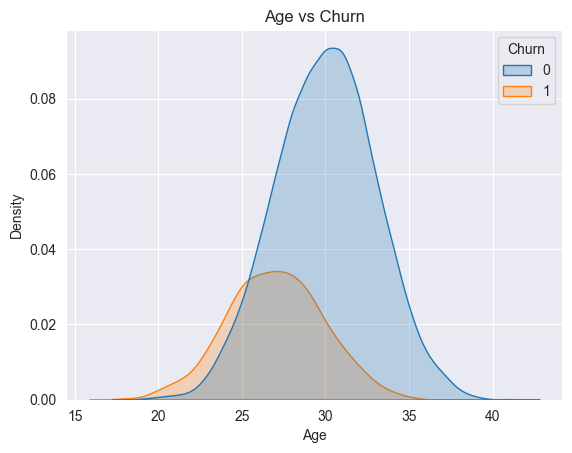

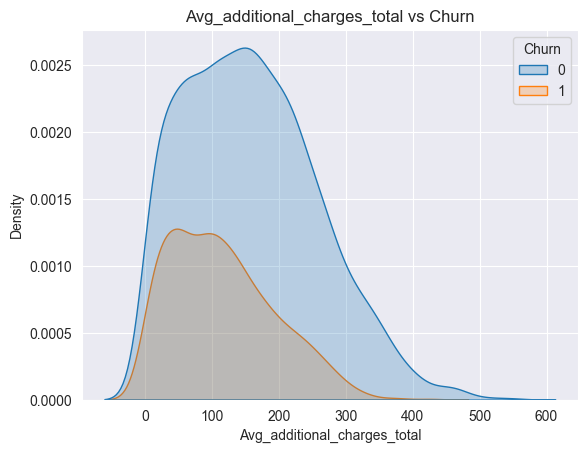

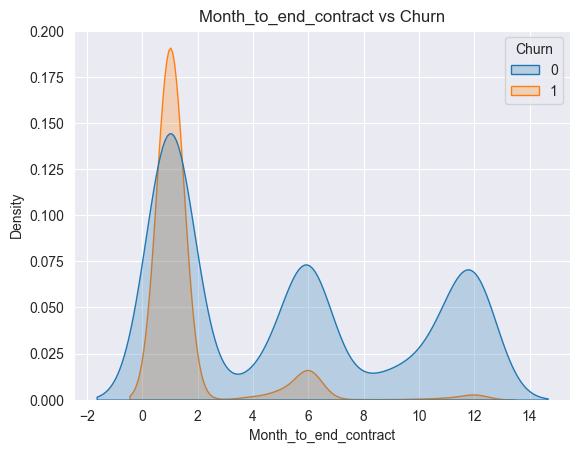

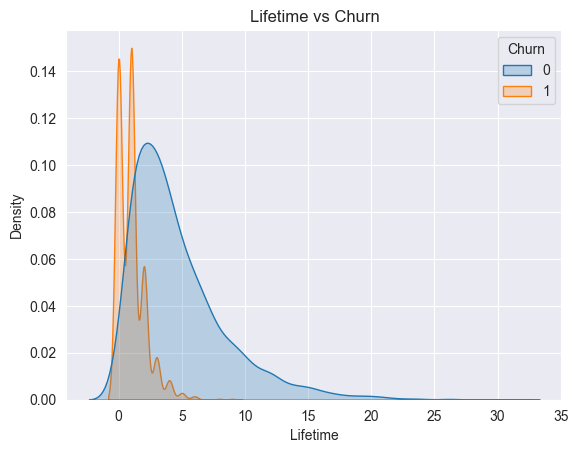

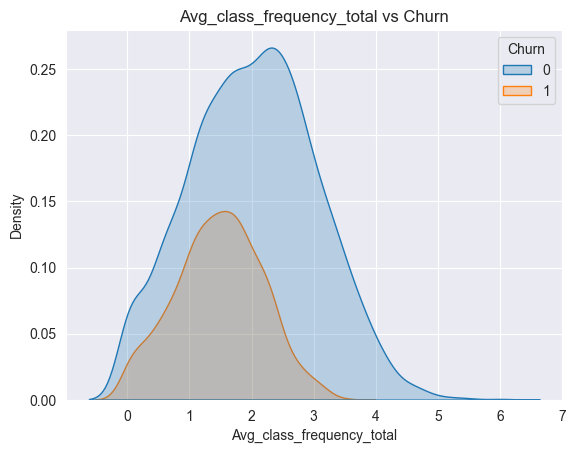

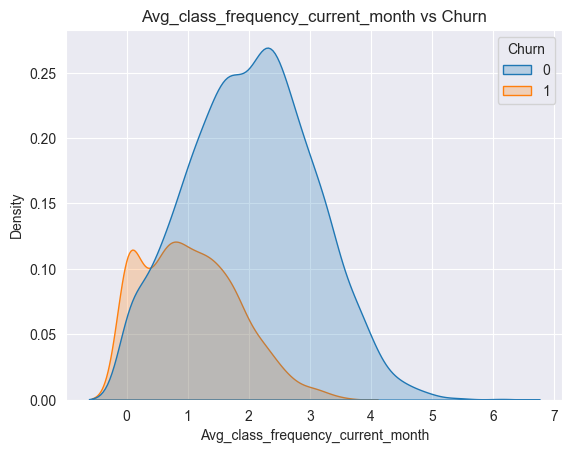

In [17]:
# 수치형 변수 - 이탈 여부에 따른 분포
num_cols = gym_df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

for col in num_cols:
    plt.figure()
    sns.kdeplot(data=gym_df, x=col, hue='Churn', fill=True)
    plt.title(f"{col} vs Churn")
    plt.show()

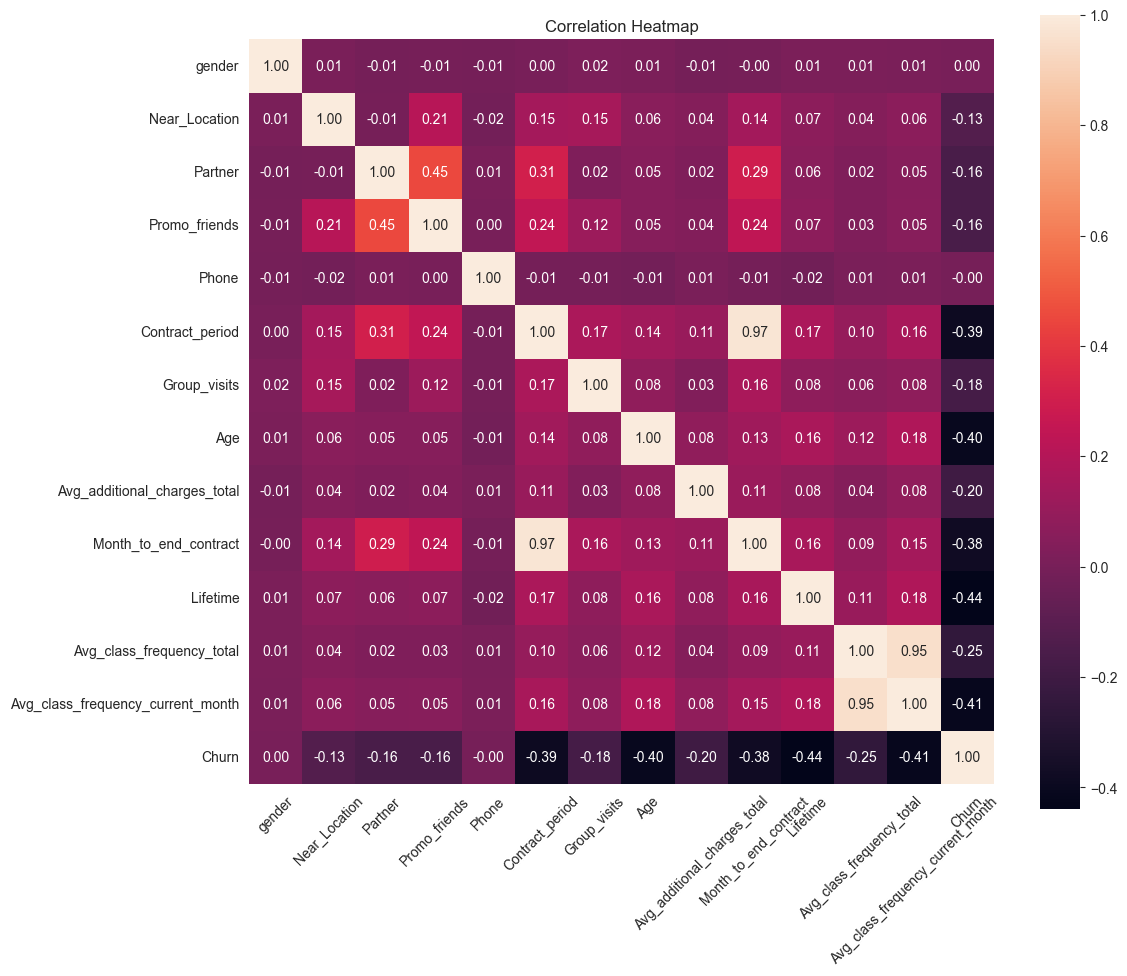

In [29]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr = gym_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# Churn 상관계수 Top 10
top_corr = corr['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
top_corr.head(10)

Lifetime                            -0.438220
Avg_class_frequency_current_month   -0.412348
Age                                 -0.404735
Contract_period                     -0.389984
Month_to_end_contract               -0.381393
Avg_class_frequency_total           -0.249715
Avg_additional_charges_total        -0.198697
Group_visits                        -0.175325
Promo_friends                       -0.162233
Partner                             -0.157986
Name: Churn, dtype: float64

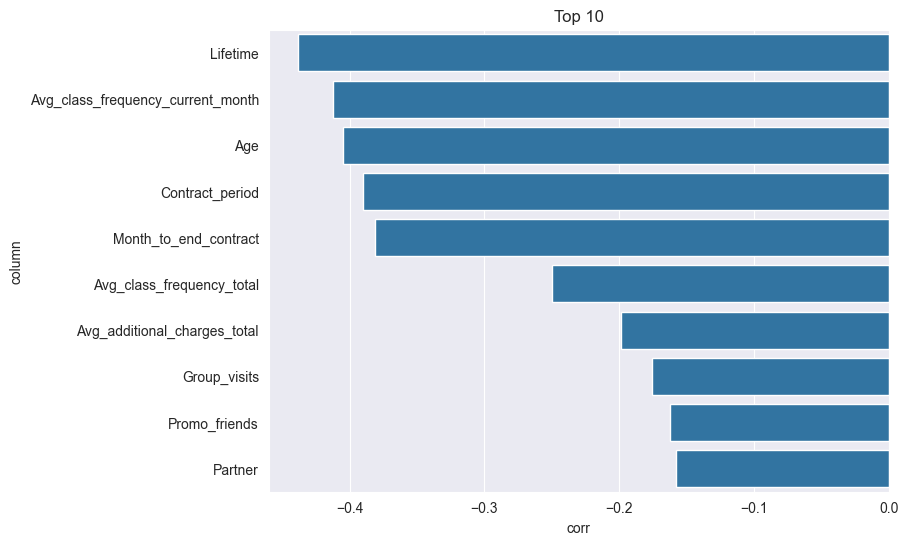

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.head(10).values,
            y=top_corr.head(10).index)
plt.title("Top 10")
plt.xlabel("corr")
plt.ylabel('column')
plt.show()

### Churn과의 상관계수 기반 인사이트

| 변수명                                       | 상관계수   | 인사이트 요약                                              |
| ----------------------------------------- | ------ |------------------------------------------------------|
| **Lifetime**                              | -0.438 | 고객이 오래 이용할수록 이탈 가능성이 낮음 → 충성도 있는 고객 유지가 핵심.          |
| **Avg\_class\_frequency\_current\_month** | -0.412 | 최근 한 달간 수업 참여율이 높을수록 이탈 가능성 낮음 → **최근 활동성 중요**       |
| **Age**                                   | -0.405 | 나이가 많을수록 이탈 가능성 낮음 → **젊은 고객층 이탈률이 더 높음**            |
| **Contract\_period**                      | -0.390 | 계약 기간이 길수록 이탈률 낮음 → **장기계약 유도** 전략 유효                |
| **Month\_to\_end\_contract**              | -0.381 | 계약 종료까지 남은 기간이 많을수록 이탈률 낮음 → **계약 종료 시점 집중 관리 필요**   |
| **Avg\_class\_frequency\_total**          | -0.250 | 전체 기간의 수업 참여율이 높을수록 이탈률 낮음 → **장기적 습관 형성이 중요**       |
| **Avg\_additional\_charges\_total**       | -0.199 | 추가 결제를 많이 한 고객은 이탈 가능성이 낮음 → **유료 부가 서비스 유도 가능성**    |
| **Group\_visits**                         | -0.175 | 그룹 방문 수가 많을수록 이탈률 낮음 → **커뮤니티 활동 강화 전략** 유효          |
| **Promo\_friends**                        | -0.162 | 친구 추천 프로모션에 참여한 고객은 이탈 가능성 낮음 → **지인 유입 채널 강화**      |
| **Partner**                               | -0.158 | 파트너(배우자, 친구 등)와 함께 등록한 경우 이탈률 낮음 → **동반 가입 프로모션 강화** |


In [2]:
!pip install --upgrade matplotlib

In [1]:
!pip install matplotlib --upgrade --force-reinstall

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipykernel 6.29.5 requires matplotlib-inline>=0.1, which is not installed.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
